# Statistical Modelling Part II

## Modey Accuracy Assessment

There are multiple metrics to consider, when evaluating the accuracy of a model:
- Bias
- Validation error
- Ranking of predictions

### Bias

**Bias:** measures whether the predictions are correct in conditional expectation.
- The simplest form is **mean bias**, which is comparing the (weighted) mean predictions with the (weighted) mean outcomes in the test set.
- While we might have no substantial bias on average, we might also want to check for **biases along the distribution** of our predictions, as we might over-/under-estimate low outcomes and under-/over-estimate high outcome.

### Validation Error

Common types of validation error are: Deviance, MSE, MAE, MSPE.
- MSE: mean squared error (usually computed on train set)
- MAE: mean absolute error (usually computed on test set)
- MSPE: mean squared prediction error (usually computed on test set)
- Deviance: measure of how well a statistical model (GLM and maximum-likelihood based model) fits the data

**Deviance:**
- It is calculated by comparing the log-likelihood of the fitted model to a saturated model
- Measurement for one observation $y$: $D(y,\hat{\mu}) = 2 \left( \log\big( p(y \mid \hat{\theta}_s) \big) - \log\big( p(y \mid \hat{\theta}_0) \big) \right)$
- Where $\hat{θ}_0$ are the fitted parameters and $\hat{θ}_s$ are the parameters of a saturated model, i.e. a model with a parameter vector for each observation, with a perfect fit.
- We usually report the mean deviance over all observations in the sample.
- The log-likelihood of the saturated model does not have to be 0 ($p(y \mid \hat{\theta}_s)$ does not have to be 1), the deviance of the saturated model must be 0.


### Ranking

**Normalized Gini:**
- The Normalized Gini tells us how well the model sorts the observations (how close the rank of prediction is relative to the rank of actual values).
- We plot the cumulative fraction of over the cumulative fraction of observation in the sample; the area between this curve a and 45 degree line is area A.
- We plot the cumulative fraction of target variable over the cumulative fraction of observation in the sample; the area between this curve b and curve a is area B.
- Normalized Gini Measurement: A/(A+B)


![my plot](graphs/normalized_gini.png)

## Regularization

**Regularization:** any techniques adopted in machine learning to prevent overfitting.

There are two types of regularization:
- **Explicit regularization:** Is when we explicitly add a term to the optimization problem, via a constraint or penalty (e.g. L1/L2-penalty).
- **Implicit regularization:** Encompasses all other forms of regularization via learning parameters, random drop, and early stopping.

### Shrinkage methods (explicit regularization):

- Shrinking coefficient estimates of parametric models, can significantly reduce their variance and improve out-of-sample performance usually at a relatively small cost of bias (bias-variance-tradeoff).
- It is achieved by adding penalty terms to the objective function that penalizes the size (suqrae or abolsute value etc.) of coefficient of parametric models.

### Ridge (or Tikhonov) Regularization (L2):
The Ridge objective function is:
$$
\sum_{i=1}^{n} 
\left( 
y_i - \beta_{0} - \sum_{j=1}^{p} \beta_j x_{ij}
\right)^2 
\;+\;
\lambda \sum_{j=1}^{p} \beta_j^2
$$
where $\lambda$ is the penalty size.

### LASSO (Least Absolute Shrinkage and Selection Operator, L1)
The LASSO objective function is:

$$
\sum_{i=1}^{n} 
\left( 
y_i - \beta_{0} - \sum_{j=1}^{p} \beta_j x_{ij}
\right)^2 
\;+\;
\lambda \sum_{j=1}^{p} |\beta_j|
$$

Note that while Ridge cannot reduce the coefficient of a feature to 0, LASSO can. This is because we can express the LASSO and the Ridge regression as constrained
optimization problems with some bound for penalty term s (for every coefficient vector $\beta$, we can find a corresponding $s$ for every $λ$). 

The equivalent constrained optimization problem for Ridge is: 
$$
\min_{\beta} 
\sum_{i=1}^{n} 
\left( 
y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij}
\right)^2
\quad \text{s.t.} \quad
\sum_{j=1}^{p} | \beta_j | \le s
$$
The equivalent constrained optimization problem for LASSO is: 
$$
\min_{\beta} 
\sum_{i=1}^{n} 
\left( 
y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij}
\right)^2
\quad \text{s.t.} \quad
\sum_{j=1}^{p} \beta_j^2 \le s
$$
For the LASSO optimization problem, the feasible region is a diamond shape, where the corners lie on the axes where one or more coefficients are exactly zero. The contours of the least-squares loss intersect the feasible region most often at these corners. Therefore, the optimal solution often occurs at a corner, with one or more coefficient beging set to zero.

### Elastic Net
It is a linear combination of L1 and L2-penalty terms:
$$
\sum_{i=1}^{n} 
\left( 
y_i - \beta_{0} - \sum_{j=1}^{p} \beta_j x_{ij}
\right)^2
\;+\;
\lambda_1 \sum_{j=1}^{p} |\beta_j|
\;+\;
\lambda_2 \sum_{j=1}^{p} \beta_j^2
$$


## Feature Selection

- Most of the time it doesn’t make sense to simply throwing all available features in the dataset to the model (due to multicollinearity, irrelevance, compute resources concerns), so we have to decide which features to use.
- There are many ways to conduct feature selection: using domain knowledge, inspect some statistiucal measures of features (e.g. correlation with target variable, MRMR, permutation feature importance), or based on some embedded methods of the model (e.g. LASSO).
- We will mainly consider the last two types of feature selection methods in this selection.

### Forward stepwise selection
In principle, we could compute models for all feature combinations and then select the best model (best subset selection). But this would mean $2^p$ models, for $p$ predictors, which is typically infeasible. A computationally more efficient option is to forward select features.

Forward stepwise selection Algorithm: 
1. Let $ \mathcal{M}_0 $ denote the null model, which contains no predictors.

2. For $ k = 0, \ldots, p - 1 $:

   (a) Consider all $ p - k $ models that augment the predictors in  
       $ \mathcal{M}_k $ with one additional predictor.

   (b) Choose the best among these $ p - k $ models, and call it  
       $ \mathcal{M}_{k+1} $.  
       Here, best is defined as having the smallest RSS or highest $ R^2 $.

3. Select a single best model from among  
   $ \mathcal{M}_0, \mathcal{M}_1, \ldots, \mathcal{M}_p $  
   using the prediction error on a validation set, $ C_p $ (AIC), BIC, or adjusted $ R^2 $. 
   Or use the cross-validation method.

The different criteria (R2, BIC, AIC) could suggest different numbers of predictors, yet it is recommended to use the cross-validation error as it makes fewer assumptions about the underlying model.

### LASSO feature selection
- We can also exploit the sparse solutions of L1-regularization for feature selection and simply drop the features which were shrunk to zero by the penalty term.
- The higher the weight on the penalty term (often referred to as α or λ), the less features are selected.

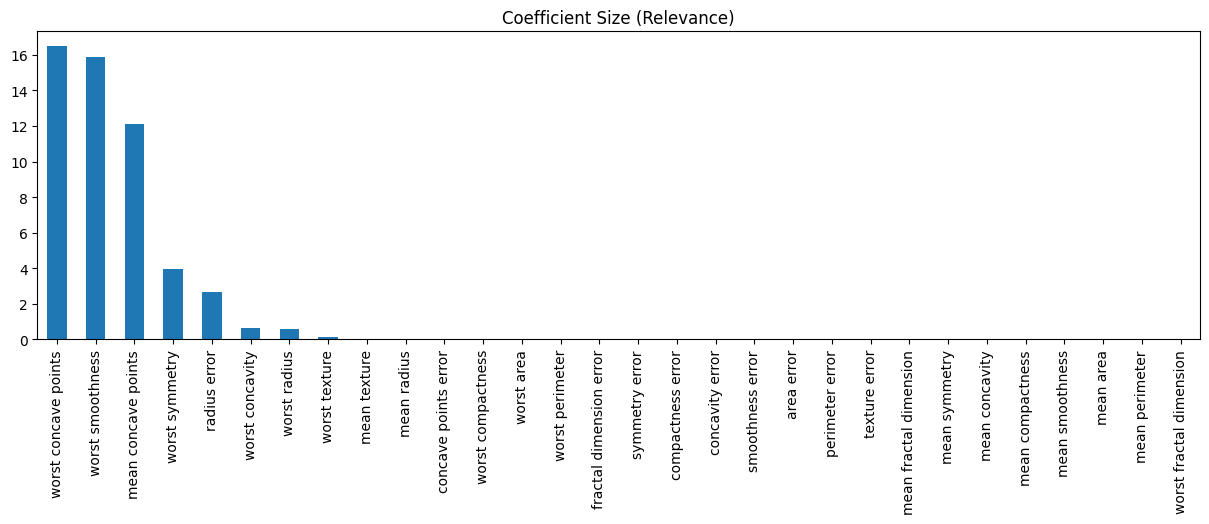

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from glum import GeneralizedLinearRegressor

# Load dataset
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

# Fit GLM with L1 regularization (LASSO: l1_ratio=1)
sel = GeneralizedLinearRegressor(
    family="binomial",
    alpha=0.01,
    l1_ratio=1,
    scale_predictors=True #scalrization is necessary for all numerical features, as the penalty is applied based on size of the coefficient
)
sel.fit(X, y)

# Plot feature relevance using absolute coefficient values
pd.Series(abs(sel.coef_), index=sel.term_names_).sort_values(
    ascending=False
).plot.bar(figsize=(15, 4))

plt.title("Coefficient Size (Relevance)")
plt.show()

### Maximum Relevance Minimum Redundancy (MRMR)
- The method tries to find the most relevant features with the lowest redundancy to other features in the model.
- The MRMR comes in different flavours for the relevance and redundancy measures and can be expressed in differences or ratios:
- F-test correlation difference (FCD):
$$
f^{FCD}(X_i)
=
F(Y, X_i)
-
\frac{1}{|S|}
\sum_{X_s \in S} \rho(X_s, X_i),
$$
- F-test correlation quotient (FCQ):
$$
f^{FCQ}(X_i)
=
\frac{F(Y, X_i)}
{\frac{1}{|S|}
\sum_{X_s \in S} \rho(X_s, X_i)}
$$

Where:
- $S$ is the set of features already selected into the model,
- $\rho(X_s, X_i)$ is the **Pearson correlation** between the already selected feature $ X_s $ and the candidate feature $ X_i $,
- $F(Y, X_i)$ is the **F-statistic** measuring the relevance of $ X_i $ with respect to the target variable $ Y $ (with H0 the coefficient of $X_i$ is 0).
- The **relevance** of a candidate feature is scored using the F-statistic.
- The **redundancy** is penalized by the average of Pearson correlations between $X_i$ and all already-selected features in $S$.
- Pearson correlation is used instead of covariance to ensure the redundancy measure is on a **comparable, scale-free range**.

Notes:
- While, the MRMR algorithm sorts the features for us, given their MRMR score, we have to decide on a number of features to include. 
- Typically, when plotting the MRMR score we see a kink somewhere, after which the features don’t show any meaningful score.
- Hence, we can set that kink as the threshold.

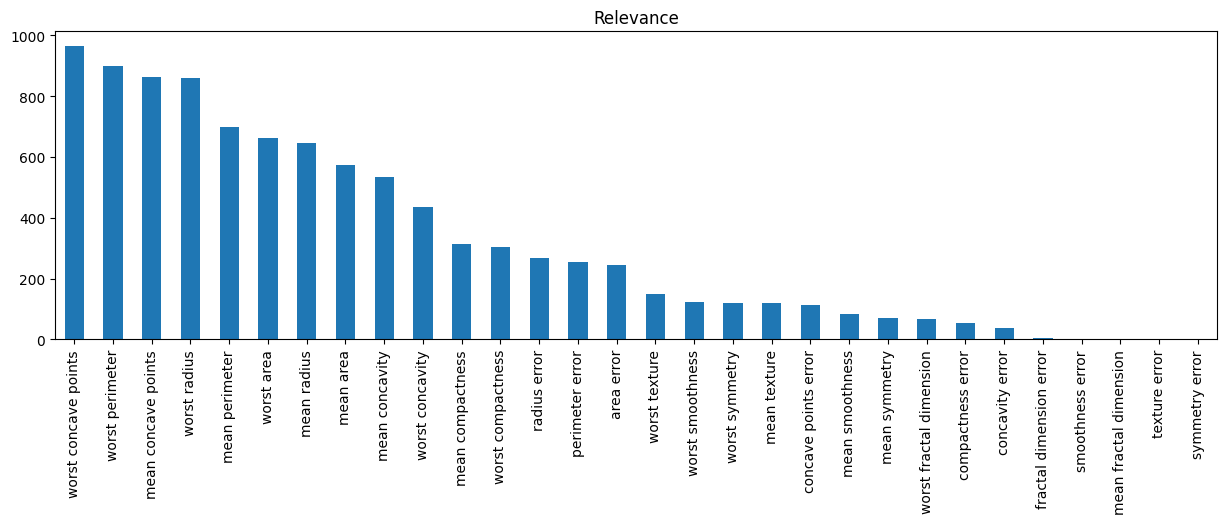

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from feature_engine.selection import MRMR

# Load dataset
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

# Fit MRMR selector using FCQ method
sel = MRMR(method="FCQ")
sel.fit(X, y)

# Plot MRMR feature relevance scores 
pd.Series(sel.relevance_, index=sel.variables_).sort_values(
    ascending=False
).plot.bar(figsize=(15, 4))

plt.title("Relevance")
plt.show()

### Tree-based feature selection
- Tree based methods provide valuable feature importance information based on the splits they computed. Based on the feature importance, we can discard irrelevant features.
- However, the number of splits as a measure of feature importance is biased towards high-cardinality features (categroical feature with a lot of unique values, over splitting them might lead to overfit, but lead to gain in training loss) as we have to split more often than for low-cardinality features. 
- The split gain, the improvement in the loss function after each split, is more informative about the actual feature importance.

### Permutation feature importance
- One model agnostic way of computing the feature importance, is by randomly shuffling the feature and observe the degradation of the model’s score. 
- Those features which lead to a higher loss in predictive accuracy, when shuffled, are more important.

**Algorithm:**

* Inputs: a fitted predictive model $m$, a tabular dataset $D$ (training data).

* Compute the reference score  $s$ as the performance of model $m$ on the original dataset $D$ (For example: accuracy for classification, $R^2$ for regression.)

* For each feature $j$ (each column of $D$)
   * For each repetition $k$ in $1, \ldots, K$:
      * Randomly shuffle column $j$ of dataset $D$ to create a corrupted dataset $\tilde{D}_{k,j}$
      * Compute the score $s_{k,j}$ of model $m$ on the corrupted dataset $\tilde{D}_{k,j}$

* Compute the importance of feature $j$ as:

$$
i_j = s - \frac{1}{K} \sum_{k=1}^{K} s_{k,j}.
$$

* A larger value of $i_j$ indicates that shuffling feature $j$ causes a larger drop in performance, meaning feature $j$ is more important.
Implementation: https://scikit-learn.org/1.5/modules/permutation_importance.html##permutation-importance


## Hyperparameter Tuning

### Important hyperparameters for GBMs:
Besides the learning_rate and the number of estimators n_estimators , we also have to tune the complexity of the individual trees. The most important learning parameters for leaf-wise growth are:
- **num_leaves:** This is the main parameter to control the complexity of the tree model. The fewer leaves we allow, the
less deep will the tree be. For depth-wise growth we would use max_depth.
- **min_data_in_leaf:** The minimum amount of observations we want in each leaf. This is a very important parameter to prevent over-fitting in a leaf-wise tree.

### Optuna
- The main challenge with hyperparameter tuning is to get better evaluations with as little tuning runs as possible. 
- We have seen the GridSearchCV approach, which would try all combinations of grid points which quickly evaluates to many trials.
- Instead, we can use step-wise tuning, which can "learn" from previous trials to improve hyper-parameter in the direction that lead to quickest decrease in validation error.
- This is what Optuna does; for LGBM, the implmentaion of Optuna for hyper-parameter tuning is avalaible here: https://medium.com/optuna/lightgbm-tuner-new-optuna-integration-for-hyperparameter-optimization-8b7095e99258

In [ ]:
# Optuna package - example of tuning random forest classifer
import optuna
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection


def objective(trial):
    iris = sklearn.datasets.load_iris()

    n_estimators = trial.suggest_int("n_estimators", 2, 20)
    max_depth = int(trial.suggest_float("max_depth", 1, 32, log=True)) 
    # we use suggest_float becuase we can use log scale sampling only with float; 
    # why use log scale: for tree-based model, tree depths without significant difference usually lead to similar behaviour, while in log scale, we can have larger change in tree depth (1 → 2 → 4 → 8 → 16 → 32 etc.) after each trial

    clf = sklearn.ensemble.RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth
    )

    return sklearn.model_selection.cross_val_score(
        clf,
        iris.data,
        iris.target,
        n_jobs=-1,
        cv=3
    ).mean()


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

trial = study.best_trial

print("Accuracy: {}".format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

/opt/anaconda3/envs/ds_notes/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-11-27 17:19:39,405] A new study created in memory with name: no-name-b0fa410b-e7f3-4fcd-8b99-043855b7166a
[I 2025-11-27 17:19:42,774] Trial 0 finished with value: 0.9466666666666667 and parameters: {'n_estimators': 9, 'max_depth': 16.507710918883458}. Best is trial 0 with value: 0.9466666666666667.
[I 2025-11-27 17:19:43,534] Trial 1 finished with value: 0.9466666666666667 and parameters: {'n_estimators': 12, 'max_depth': 2.44021794251833}. Best is trial 0 with value: 0.9466666666666667.
[I 2025-11-27 17:19:44,223] Trial 2 finished with value: 0.9466666666666667 and parameters: {'n_estimators': 6, 'max_depth': 13.474321555259365}. Best is trial 0 with value: 0.9466666666666667.
[I 2025-11-27 17:19:44,238] Trial 3 finish

Accuracy: 0.9733333333333333
Best hyperparameters: {'n_estimators': 15, 'max_depth': 4.9740061623991565}


## Advanced Modelling Topics

### Interaction constraints
- Two features X_1, X_2 interact within a model, if the second-order partial derivative w.r.t X_1 and X-2 is non-zero.
- Sometimes we want to disallow specific interactions as we want the final model to be linear w.r.t. the marginal effect of some feature.

Applying interaction constraint:
- **Parametric Models:** any interaction constraint is implicit, as we simply don’t include the interaction in the first place.
- **Tree-based Models:** trees are very eager in interacting features, hence we have to explicitly exclude interactions if we want to constrain them. Within a tree, features are only interacting when they appear in the same branch.

![my plot](graphs/interaction_const.png)

### Monotonicity Constraints
- We sometimes want to constrain our model to follow a specific monotonicity with respect to specific numeric or ordinal categoricals.
- In essence, this is also a way of regularizing our model using domain knowledge.

Example:
- Take the mileage example: for the same risk factors, we expect the risk of a car accident to increase the more miles/km a person drives.
- Yet, with too little data in some segments, we might empirically observe a break of this monotonicity.
- Hence, we use a monotonicity constraint to tell the model that the marginal effect should be monotonically increasing.

How are monotonicity constraints implemented:
* **Parametric models:**
    * In parametric models, we would have to make sure the coefficients represent the monotonicity, either in their order, if the feature is dummy encoded, or in the signs, e.g. when the feature is modelled as a spline or polynomial.
* **Tree based models:**
    * Tree based models offer a quite native structure to implement monotonicity constraints. We would only split, if the split obeys the monotonicity. 
    * Thereby we do not even form any interactions of splits which would undermine the monotonicity.
    * Given the additivity of trees when boosting or in a random forest, the monotonicity also holds globally.
    * For example, if we want the target variable to only increase in X, we can force that after a split X_s, for observation with X > X_s, we require the mean to be larger than the mean of target variable for all observation (before split), vice versa for X < X_s.

![my plot](graphs/monotonic_constraint.png)

**How to introduce monotonicity constraints in LGBM:**
- Using the learning parameter **monotone_constraint**, we can provide a list of feature specific constraints.
- Without any convenience wrapper, we have to specify all features in their order: [-1, 0, 1] , where −1 means decreasing in the 1st feature, 0 no monotonicity constraint in the 2nd feature and 1 increasing in the 3rd feature.

### Custom loss function in LGBM
- In real-world industry setting we can face very specific loss functions far beyond loss functions for specific distributions.
- For instance, we might face a client-specific profit function for which we are asked to find an optimal price function. 
- This can either be achieved by setting up and optimizing the problem parametrically, or we could specify the custom loss function and its derivatives and boost based on some feature space.
- Every convex, 2-times differentiable loss function can be minimized using GBMs.

In [ ]:
import numpy as np

# Define the custom loss function based on gradient and hessian
# we have to define both gradient and hessian of our custom loss function in term of preds and actual target, so that the booster can know which direction to improve in
def custom_mse_loss(preds, data):
    gradient = (preds - data.get_label())
    hessian = np.ones_like(preds)
    return gradient, hessian

# Wrapper function for LightGBM
# we define custom function here, False means that lower the function value is better for the model
def custom_mse_eval(preds, data):
    loss = (preds - data.get_label())**2
    return "mse", loss.mean(), False

# Generate some sample data
X_train = np.array(np.random.uniform(size=1000)).reshape(-1, 1)
y_train = 2 * X_train

import lightgbm as lgb

# Train LightGBM models using default and custom loss functions
params_default = {'objective': 'regression', 'metric': 'mse'}
params_custom = {'objective': custom_mse_loss, 'metric': 'mse'}
model_default = lgb.train(params_default, lgb_train, num_boost_round=100)
lgb_train = lgb.Dataset(X_train, y_train)

params_custom = {'objective': custom_mse_loss, 'metric': 'mse'}
model_custom = lgb.train(params_custom,
                         lgb_train,
                         num_boost_round=100,
                         feval=custom_mse_eval) #set evaluation function to custom loss function

# Make predictions
y_pred_default = model_default.predict(X_train)
y_pred_custom  = model_custom.predict(X_train)

# Assert predictions are the same
assert all(np.isclose(y_pred_default, y_pred_custom, atol=0.0001))

/opt/anaconda3/envs/ds_notes/lib/python3.12/site-packages/lightgbm/basic.py:374: UserWarning: Converting column-vector to 1d array
  _log_warning("Converting column-vector to 1d array")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 1000, number of used features: 1
[LightGBM] [Info] Start training from score 0.988750
[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 1000, number of used features: 1
[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [